In [5]:
pip install pytrends plotly pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
import plotly.io as pio
pio.renderers.default = 'notebook'  # or 'iframe' or 'colab' depending on your environment

In [9]:
from pytrends.request import TrendReq
import plotly.graph_objects as go

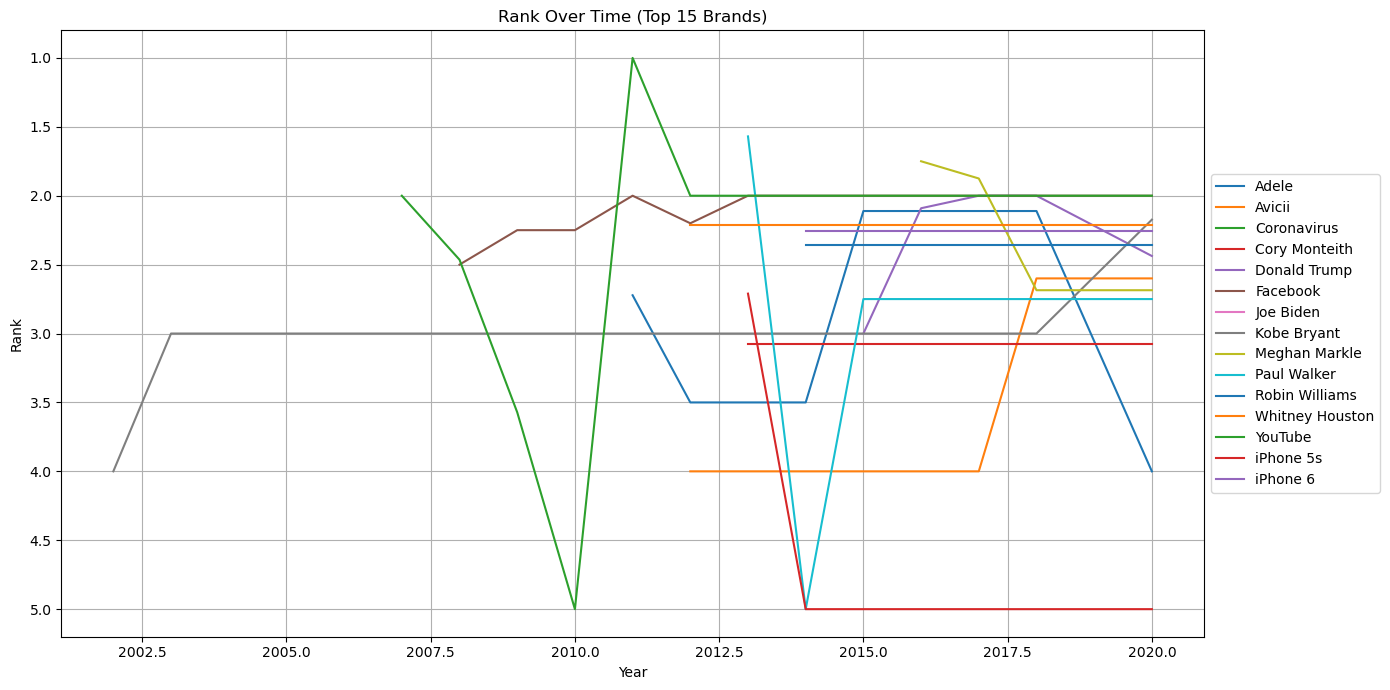

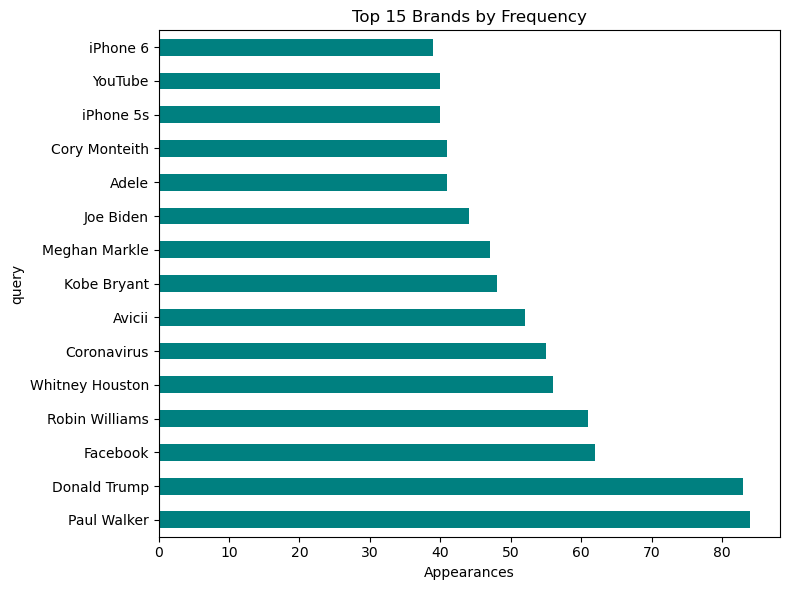

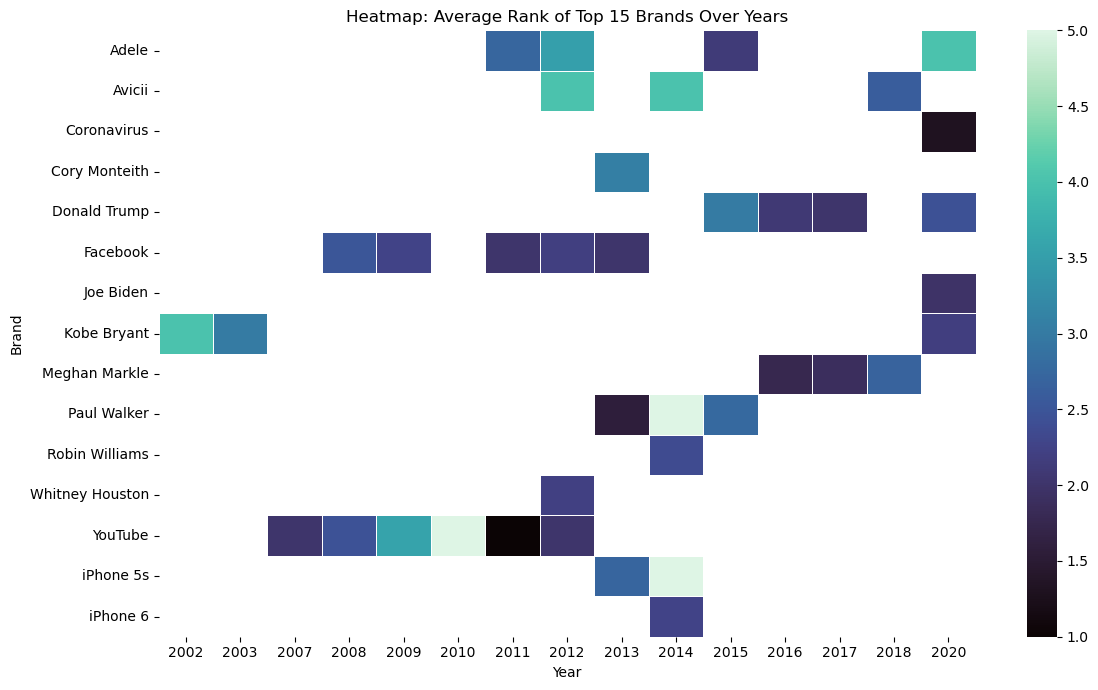

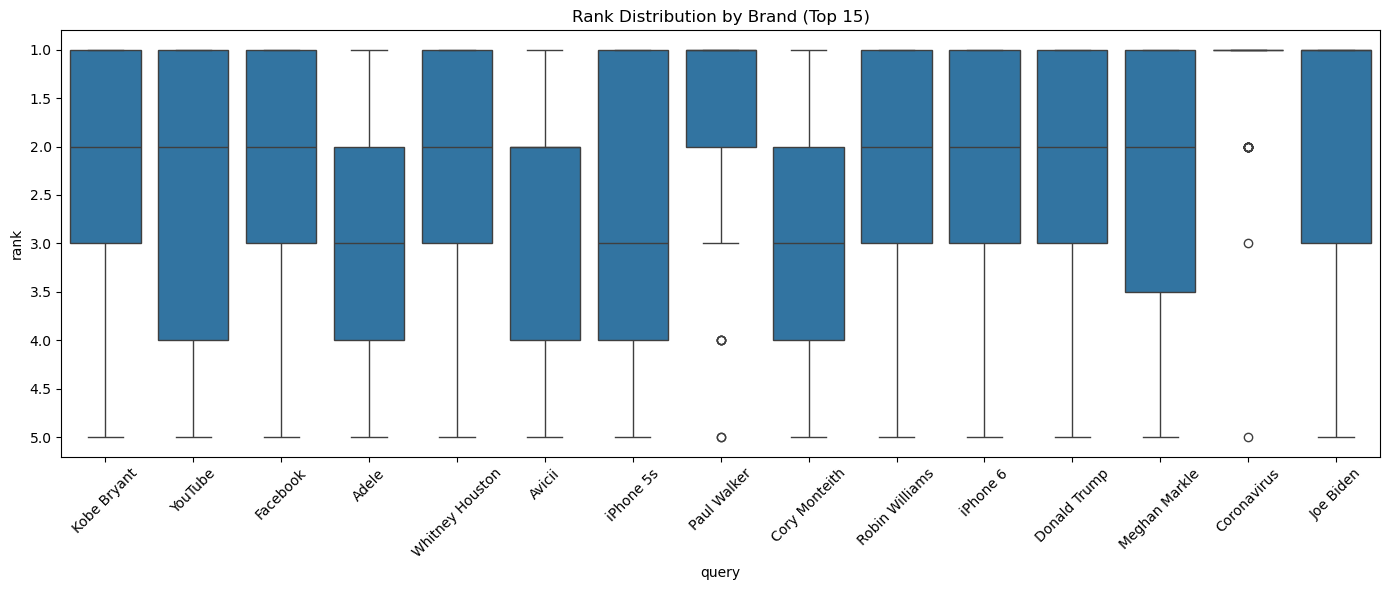

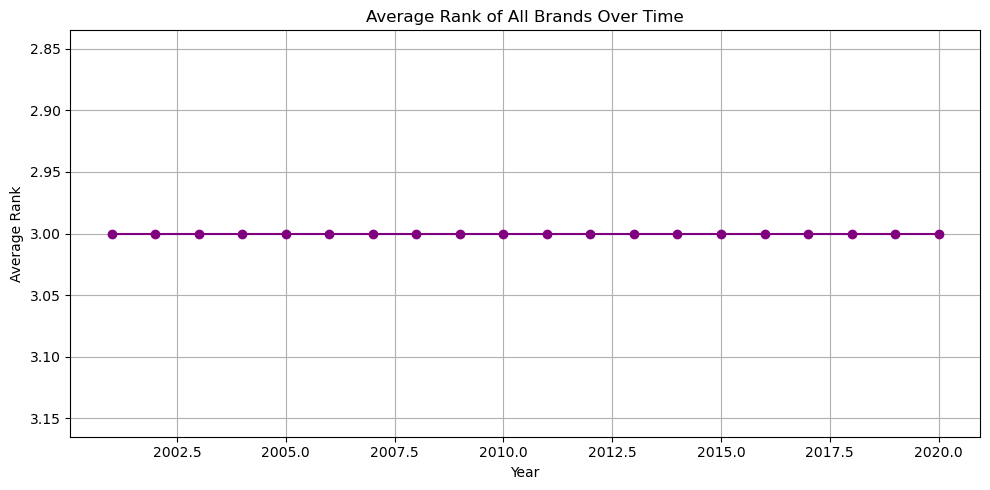

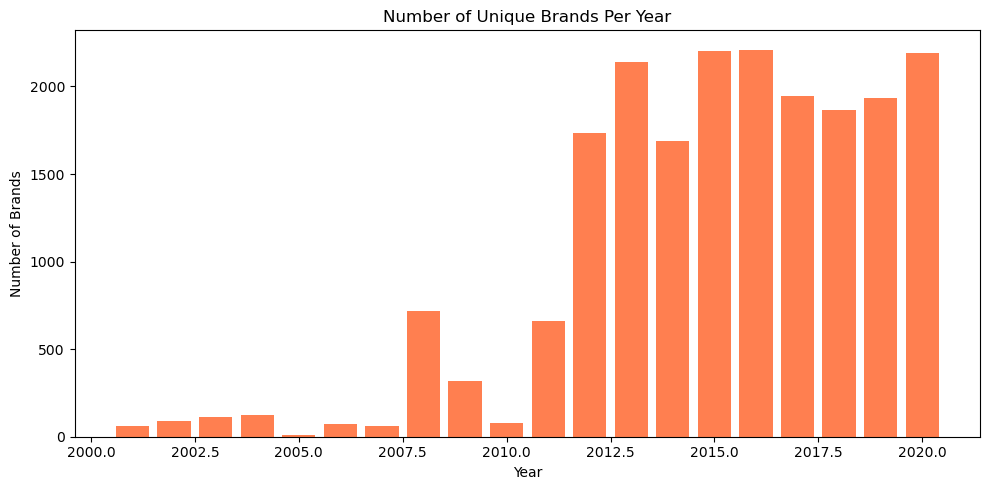

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

# Show Plotly charts in browser
pio.renderers.default = 'browser'

# Load the dataset
df = pd.read_csv(r"C:\rakshitha\2nd year\archive (1)\trends.csv")

# Drop missing and duplicate rows
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df['year'] = df['year'].astype(int)

# --- Get top 15 most frequent brands ---
top_brands = df['query'].value_counts().head(15).index
df_top = df[df['query'].isin(top_brands)]

# --- Pivot only top brands ---
df_pivot = df_top.pivot_table(index='year', columns='query', values='rank', aggfunc='mean')
df_pivot = df_pivot.ffill()


# --- Line Plot (Top 15 Brands Only) ---
plt.figure(figsize=(14, 7))
for brand in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[brand], label=brand)
plt.gca().invert_yaxis()
plt.title('Rank Over Time (Top 15 Brands)')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Bar Chart: Frequency of Top 15 Brands ---
plt.figure(figsize=(8, 6))
df['query'].value_counts().head(15).plot(kind='barh', color='teal')
plt.title('Top 15 Brands by Frequency')
plt.xlabel('Appearances')
plt.tight_layout()
plt.show()

# --- Heatmap: Average Rank by Year for Top Brands ---
heatmap_data = df_top.pivot_table(index='query', columns='year', values='rank', aggfunc='mean')
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, cmap='mako', linewidths=0.5)
plt.title('Heatmap: Average Rank of Top 15 Brands Over Years')
plt.xlabel('Year')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

# --- Boxplot: Rank Distributions of Top Brands ---
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_top, x='query', y='rank')
plt.title('Rank Distribution by Brand (Top 15)')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# --- Avg Rank Over Time (All Brands) ---
avg_rank_all = df.groupby('year')['rank'].mean()
plt.figure(figsize=(10, 5))
plt.plot(avg_rank_all.index, avg_rank_all.values, marker='o', color='purple')
plt.title('Average Rank of All Brands Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rank')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Number of Unique Brands Per Year ---
brands_per_year = df.groupby('year')['query'].nunique()
plt.figure(figsize=(10, 5))
plt.bar(brands_per_year.index, brands_per_year.values, color='coral')
plt.title('Number of Unique Brands Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Brands')
plt.tight_layout()
plt.show()

# --- Plotly Interactive Line Chart (Top Brands) ---
fig = px.line(df_top, x='year', y='rank', color='query',
              title='Interactive Line Plot - Top 15 Brands')
fig.update_yaxes(autorange='reversed')
fig.update_layout(height=600)
fig.show()

# --- Plotly Interactive Pie Chart (Top Brands by Frequency) ---
brand_counts = df['query'].value_counts().head(15).reset_index()
brand_counts.columns = ['Brand', 'Frequency']
fig_pie = px.pie(brand_counts, names='Brand', values='Frequency',
                 title='Top 15 Brands - Frequency Distribution',
                 hole=0.3)  # donut style
fig_pie.update_traces(textinfo='percent+label')
fig_pie.show()

In [5]:
print(df.columns)


Index(['location', 'year', 'category', 'rank', 'query'], dtype='object')


In [7]:
# Create Prophet-compatible dataframe
df_prophet = df[['year', 'rank']].copy()

# Rename columns for Prophet
df_prophet.rename(columns={'year': 'ds', 'rank': 'y'}, inplace=True)

# Convert 'ds' column to datetime (assume Jan 1st of each year)
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')

# Ensure 'y' is float
df_prophet['y'] = df_prophet['y'].astype(float)


In [9]:
pip install prophet


Note: you may need to restart the kernel to use updated packages.


In [11]:
from prophet import Prophet
model = Prophet()
model.fit(df_prophet)


00:56:14 - cmdstanpy - INFO - Chain [1] start processing
00:56:14 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future = model.make_future_dataframe(periods=12, freq='ME')  # 'ME' for monthly frequency


In [15]:
# Make predictions on the future dataframe
forecast = model.predict(future)

# View the forecasted results
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)  # last 12 rows for the forecast

,ds,yhat,yhat_lower,yhat_upper
20,2020-01-31,0.800068,-1.050496,2.692171
21,2020-02-29,0.917135,-0.988361,2.608297
22,2020-03-31,1.029575,-0.763670,2.770628
23,2020-04-30,1.129518,-0.557123,2.940583
24,2020-05-31,1.172461,-0.584873,3.008986
25,2020-06-30,1.174713,-0.621353,3.065819
26,2020-07-31,1.136749,-0.807294,2.925518
27,2020-08-31,1.073265,-0.883887,2.869342
28,2020-09-30,0.981309,-0.834345,2.888587
29,2020-10-31,0.911710,-0.905597,2.753600


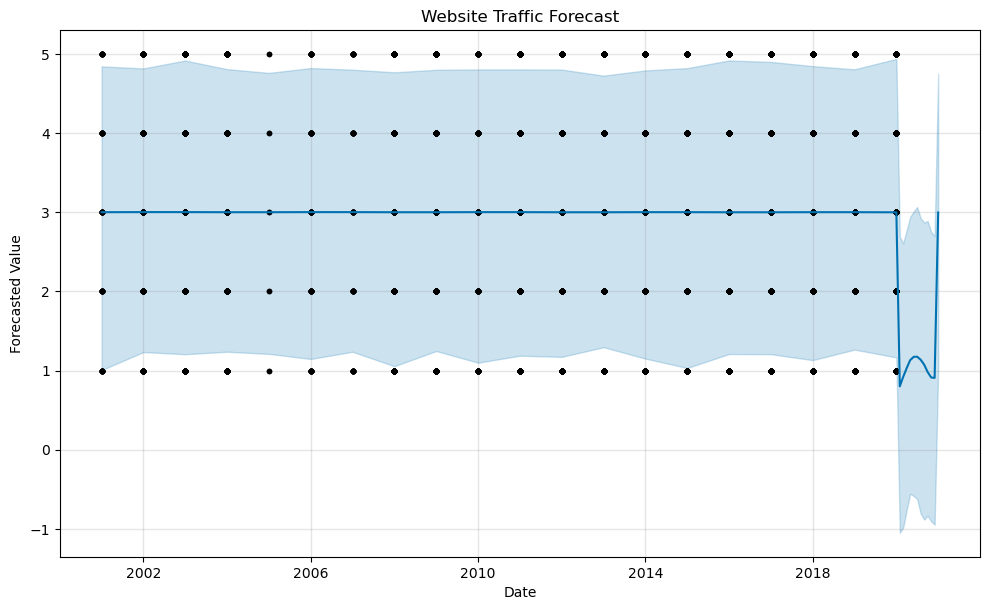

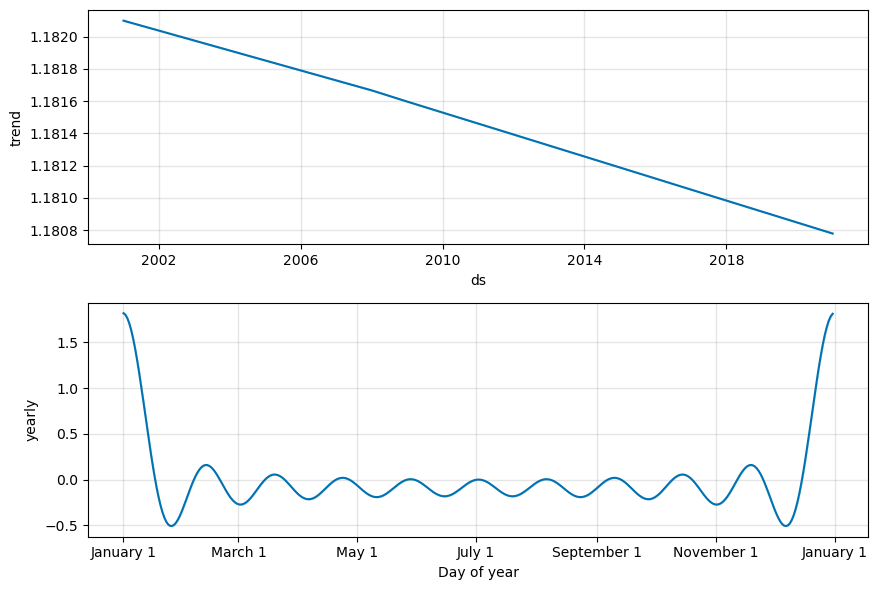

In [17]:
model.plot(forecast)
plt.title('Website Traffic Forecast')
plt.xlabel('Date')
plt.ylabel('Forecasted Value')
plt.show()

model.plot_components(forecast)
plt.show()


In [33]:
pip install --upgrade prophet cmdstanpy


Note: you may need to restart the kernel to use updated packages.


In [19]:
from prophet.diagnostics import cross_validation, performance_metrics

# Cross-validation: Initial training on 80%, forecast horizon of 365 days
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')

# Compute evaluation metrics
df_p = performance_metrics(df_cv)
print(df_p[['horizon', 'rmse', 'mape']].head())


  0%|          | 0/33 [00:00<?, ?it/s]

00:56:33 - cmdstanpy - INFO - Chain [1] start processing
00:56:33 - cmdstanpy - INFO - Chain [1] done processing
00:56:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:56:33 - cmdstanpy - INFO - Chain [1] start processing
00:56:34 - cmdstanpy - INFO - Chain [1] done processing
00:56:34 - cmdstanpy - INFO - Chain [1] start processing
00:56:34 - cmdstanpy - INFO - Chain [1] done processing
00:56:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:56:34 - cmdstanpy - INFO - Chain [1] start processing
00:56:35 - cmdstanpy - INFO - Chain [1] done processing
00:56:35 - cmdstanpy - INFO - Chain [1] start processing
00:56:36 - cmdstanpy - INFO - Chain [1] done processing
00:56:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

   horizon      rmse      mape
0 149 days  1.414214  0.630151
1 154 days  1.414214  0.630412
2 159 days  1.414215  0.630614
3 164 days  1.414216  0.630716
4 170 days  1.414215  0.630255


In [21]:
model = Prophet(
    yearly_seasonality=True,
    changepoint_prior_scale=0.1  # Increase to make model more flexible
)
model.fit(df_prophet)


00:58:20 - cmdstanpy - INFO - Chain [1] start processing
00:58:21 - cmdstanpy - INFO - Chain [1] done processing
